# Exercise 4 Modeling efficient filters of an artifical system

**Objective:** The goal of this assignment is to build models of efficient code for it for an artificial visual system. The artificial visual system must be the same as exercise 3.

**Components:** There are only coding and interpretation components for the statistics.

**Code organization:** Several files are provided to you: exercise4.ipynb (the jupyter notebook); io_image_data.py; visual_system.py. 
In exercise4.ipynb you should write your written text answers, in this file you only need to change the exercise3_folder_path;  exercise4_folder_path. Depending on your data, you might need to change the values of noise_variance_list.
The remaining code should be written in the file visual_system.py.
To run this code you need to install a new package, scikit-learn, documentation at https://scikit-learn.org/stable/. For ubuntu users you just have to type in your terminal: pip3 install -U scikit-learn. The others must search on the installation page:
https://scikit-learn.org/stable/install.html

**Submission:** Please name your file MI210_ExerciseX_GroupY.zip, where X is the number of the exercise and Y is your group number. The submission deadline is May 4, please try to submit on the moodle. The fifth class will be held on zoom just to answer questions. Please use the forum created for this exercise.

In [1]:
# load packages
%load_ext autoreload
#this is to update your packages automatically
%autoreload 2
# more info https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html#autoreload
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
exercise3_folder_path = '/Users/alexandre/Documents/ENSTA/2A/MI210/Exercise3/'  # This string must end with a slash ('/') 
import sys
sys.path.append(exercise3_folder_path) 
import io_image_data
import image_data_analysis 
import visual_system

In [2]:
exercise4_folder_path = '/Users/alexandre/Documents/ENSTA/2A/MI210/exercise4/'  # This string must end with a slash ('/') 
dataset_type = 'domestic_robot' #please choose the one asigned to your group. Possible datasets = {airport_robot, autonomous_vehicle,domestic_robot, submarine_robot}
dataset_file_name = exercise3_folder_path+dataset_type+'.hdf5'

In [3]:
#defining output file names 
average_PS_results_file_name = exercise3_folder_path + "average_PS.hdf5" 
whitening_filters_results_file_name = exercise4_folder_path + "whitening_filters.hdf5"
independent_components_results_file_name = exercise4_folder_path + "independent_components.hdf5"

In [4]:
# Usually you do not need to change this parameters. 
sample_size = [12,12] #image sample size for the power spectrum
number_of_samples = int(5e4); #number of samples from the dataset for estimating ICAs

**Question 1** 
In visual_system.py write a function that estimates the power spectrum whitening filters of your visual
system for various levels of noise. (hint1: in the slides of the class there is the equation. Hint 2: If you used NumPy.fft.fftshift to visualize and save the average power spectrum do not forget to use NumPy.fft.ifftshift
before and after the use of the (inverse) Fourier transform. hint 3: By default, the result
of NumPy.fft.ifft2 is a NumPy array of complex values. In our case, the imaginary part
of the filter is zero. Convert the array of complex to an array of doubles using
NumPy.real).

In [5]:
average_PS = io_image_data.readH5(average_PS_results_file_name, 'average_PS')

In [6]:
noise_variance_list = [10**(-i) for i in range(-3,2)] #if you do not see anything interesting you can change these values

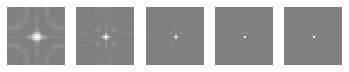

In [7]:
whitening_filters = [];
for noise_variance in noise_variance_list:
    whitening_filters.append(visual_system.get_power_spectrum_whitening_filter(average_PS,noise_variance))

io_image_data.saveH5(whitening_filters_results_file_name,'whitening_filters',np.array(whitening_filters))
visual_system.make_whitening_filters_figure(whitening_filters)

**Question 2** Compare the whitening filters of your system with the receptive fields of monkey ganglion cells.

A2: Write your answer here  
It looks very much like the receptive fields of monkey ganglion cells with a positive center part and negative surrounding.

**Question 3** In visual_system write a function that downloads a sample of images from your dataset.

**Question 4** In visual_system write a function that makes the data pre-processing for ICA 

**Question 5** In visual_system write a function that estimates the independent components of your visual system. (Hint1: Tutorial on blind source separation using PCA and ICA in sckit: http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html
Hint 2: To avoid that you estimate new whitening filters you can use the option of FastICA to whiten the data in the fly.
Hint 3: To use the algorithm presented in the class you should set the option algorithm='parallel' in FastICA.)

In [8]:
X = visual_system.get_ICA_input_data(dataset_file_name, sample_size, number_of_samples)

In [9]:
X = visual_system.pre_process(X);

(50000, 144)


In [10]:
W = visual_system.get_IC(X)

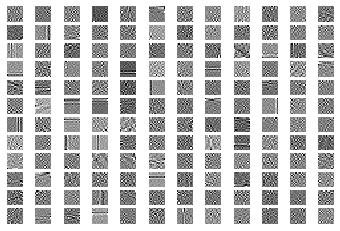

In [11]:
io_image_data.saveH5(independent_components_results_file_name,'IC',W)
visual_system.make_idependent_components_figure(W,sample_size)

**Question 6** Compare the independent components of your system with the receptive fields of monkey V1

A6 : write your answer here. 
The independent components of our system looks a lot like the receptive fields of monkey V1. Therefore, our independent components could be helpful in a computer vision application.

**Question 7** In visual system write a function that, given observations and its independent components estimates the independent sources of the observations.

In [12]:
S = visual_system.estimate_sources(W, X)
print(S.shape)

(144, 50000)


**Question 8** Compare the sources kurtosis with the kurtosis of standard Gaussian. For that you may write as many functions in visual_system.py as necessary.

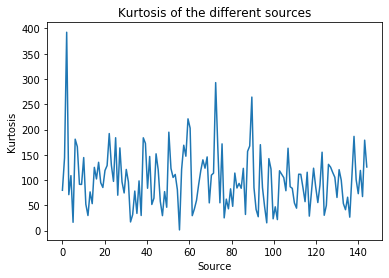

done


In [23]:
visual_system.make_kurtosis_figure(S)

A8. Write your answer here.  
We can see that the kurtosis of our 144 sources is not null which means that the sources are not gaussian. We can conclude that our images are natural images and not white noise.